# ECON 490: Graphs (9)

## Prerequisites

1. Load data and packages.
2. Create variables and objects.
3. Have some familiarity with the syntax of commands. 

## Learning Outcomes 

1. Identify best practices for data visualization.
2. Distinguish between the main forms of visualization using economic data: scatter plots, line plots, bar plots, and histograms.
3. Feel comfortable with the syntax of `ggplot2`, which includes the use of geometries, aesthetic layers, labeling and themes.
4. Store graphs in png or svg format.

## 9.1 General Points about Visualization

If you are familiar with Stata, you will notice that graphs in R are completely different. The most important and widely used package for data visualization in R is `ggplot2`. This package operates under the premise that every graph can be decomposed into the following layers: 

* Data : the very base of every graph, where it comes from.
* Mapping: informs graphics which variables are going to be part of some graphical property (e.g. column 3 of the data is going to be the dependent variable and y-axis of some graph).
* Statistics: transforms the input variables to be displayed (e.g. graphs the means of some particular columns, counts the number of observations in some category).
* Scales: indicates the relationship between variables and properties (e.g. we want to associate different colours with different values of a region variable). 
* Geometries: a key layer of the  graph structure. The geometry indicates the general aesthetic of the graph (e.g. a line, a polygon, etc). 
* Facets: this can be used to split data into different sub-plots.
* Coordinates: dictates the positioning of variables. It thinks of the world as an X and Y axis by default, but more generally there can be more complicated structures (e.g. cartography!).
* Theme: deals with other graphic information that is not related to the previous parts (e.g. background colour of our graph).

In the next section, we will look at how to construct a standard graph. You will notice how `ggplot2` tries to respect the above structure when constructing graphic information. 

First, let's load in the data set that we've been using so far in these modules. Recall that this data set is simulating information for workers in the years 1982-2012 in a fake country where a training program was introduced in 2003 to boost their earnings.

Let's also clear our memory and installing/import the necessary packages below.

In [2]:
#Clear the memory from any pre-existing objects
rm(list=ls())

# Install in our packages
install.packages("tmap")
install.packages("maps")
install.packages("mapproj")

# loading in our packages
library(tidyverse)
library(magrittr)
library(ggplot2)
library(maps)
library(mapproj)
library(tmap) 

#Open the dataset 
fake_data <- read_csv("../econ490-stata/fake_data.csv")  #change me!

# inspecting the data
glimpse(fake_data)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Rows: 2861772 Columns: 9

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): sex
dbl (8): workerid, year, birth_year, age, start_year, region, treated, earnings


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Rows: 2,861,772
Columns: 9
$ workerid   <dbl> 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 8, 8, 9,~
$ year       <dbl> 1999, 2001, 2001, 2002, 2003, 2005, 2010, 1997, 2001, 2009,~
$ sex        <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M",~
$ birth_year <dbl> 1944, 1944, 1947, 1947, 1947, 1951, 1951, 1952, 1952, 1954,~
$ age        <dbl> 55, 57, 54, 55, 56, 54, 59, 45, 49, 55, 57, 41, 45, 46, 49,~
$ start_year <dbl> 1997, 1997, 2001, 2001, 2001, 2005, 2005, 1997, 1997, 1998,~
$ region     <dbl> 1, 1, 4, 4, 4, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 2, 2, 4, 4, 2,~
$ treated    <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ earnings   <dbl> 39975.010, 278378.100, 18682.600, 293336.400, 111797.300, 8~


## 9.2 Types of Graphs

#### 9.2.1 Scatter plots

Scatter plots are used to demonstrate how two quantitative variables are related to one another. This plot works well when we are interested in showing relationships and groupings among variables from relatively large data sets. Below is an example of a nice scatter plot.

![Relationship of country religiosity vs wealth](https://ourworldindata.org/uploads/2013/11/GDP-vs-Religion.png)

Let's say we want to plot log earnings by year. We begin by generating a new variable for log earnings.

In [4]:
fake_data <- fake_data %>%
        mutate(log_earnings = log(earnings)) # the log function

The purpose of a scatter plot is to observe how variables related to one another. We can now create our scatter plot.

In [10]:
figure <- ggplot(data = fake_data, # referencing the data we chose
                 aes(
                     x = year,  # x is year
                     y = log_earnings # our y is avg logearnings
                 ))

We have used the data layer and the mapping layer (as part of the aesthetics). However, we need a little bit more to be able to create a visualization. We require some geometry, the elemental part of any graph!

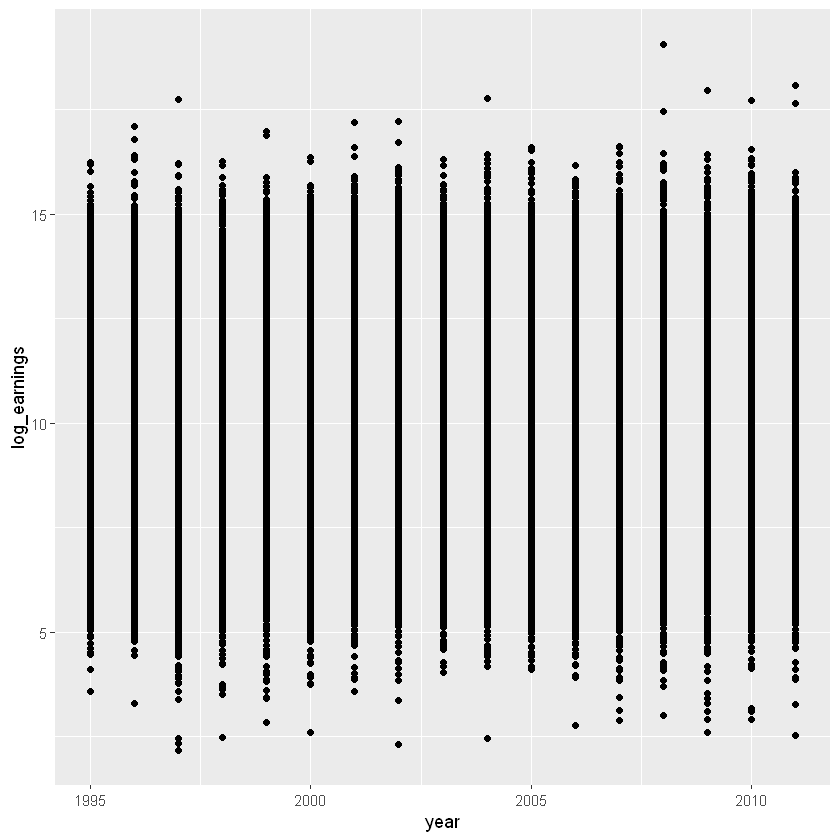

In [11]:
figure + geom_point()

This graph looks very messy! This is because we have plotted every observation, meaning there are 2 million dots in the graph. This makes it very difficult for us to observe any type of relationship. In fact this graph makes it look like wages doesn't change across time at all. 

A very useful tool when creating graphs is to filter out some parts of our data for ease of visualization. For example, lets imagine we have a yearly census, but we want to observe the relationship between the ages and earnings of female workers of a specific town in 2015. Without filtering out the data it will be impossible to create such a graph from a yearly census. By filtering out redundant data, we can investigate this specific relationship more clearly.

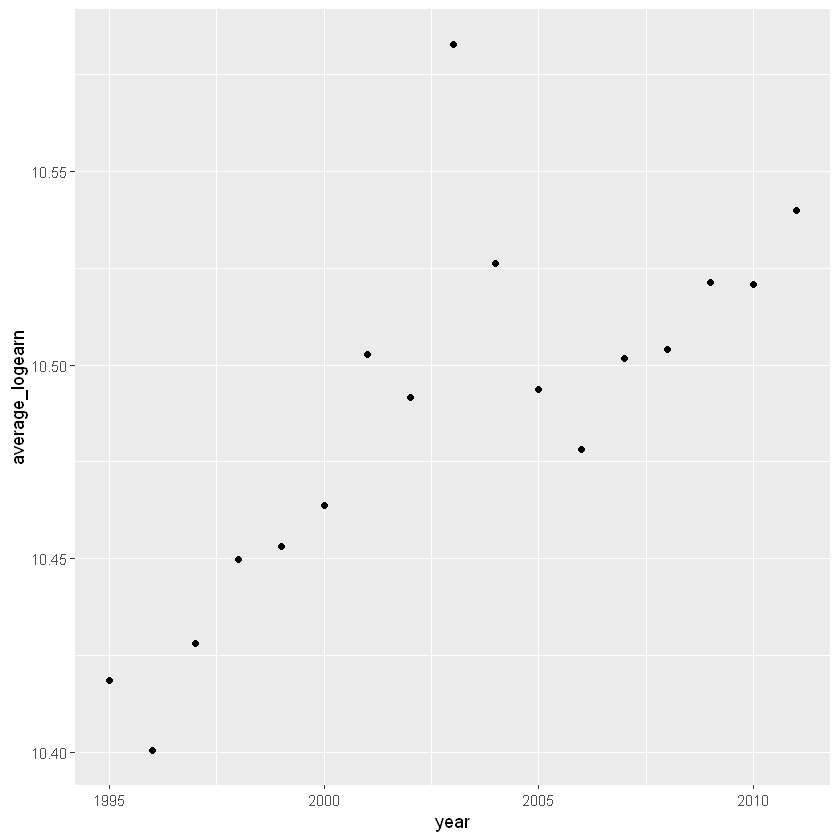

In [13]:
# creating a version of fake data that only shows females of region 5 in 2005.
figure1_data <- filter(fake_data, (year == 2005)|(region == 5)|(sex == "F"))

figure1 <- ggplot(data = figure1_data, # referencing the data we filtered
                 aes(
                     x = age,  # x is year
                     y = log_earnings # our y is avg logearnings
                 ))


figure1 <- figure1 + geom_point()
figure1

Now our graph is looking better! You can play around with different options that can be found in the [documentation](https://ggplot2.tidyverse.org/reference/). For instance, one can include labels and a theme:

In [15]:
figure1 = figure1 + geom_point() + labs(x = "Age",
                        y = "Average Log-Earnings",
                        title = "Earnings Trends by Female Worker's Age in 2005") +
                        theme(
                            text = element_text(
                                size = 20)) # increases text size: try playing around with this number!


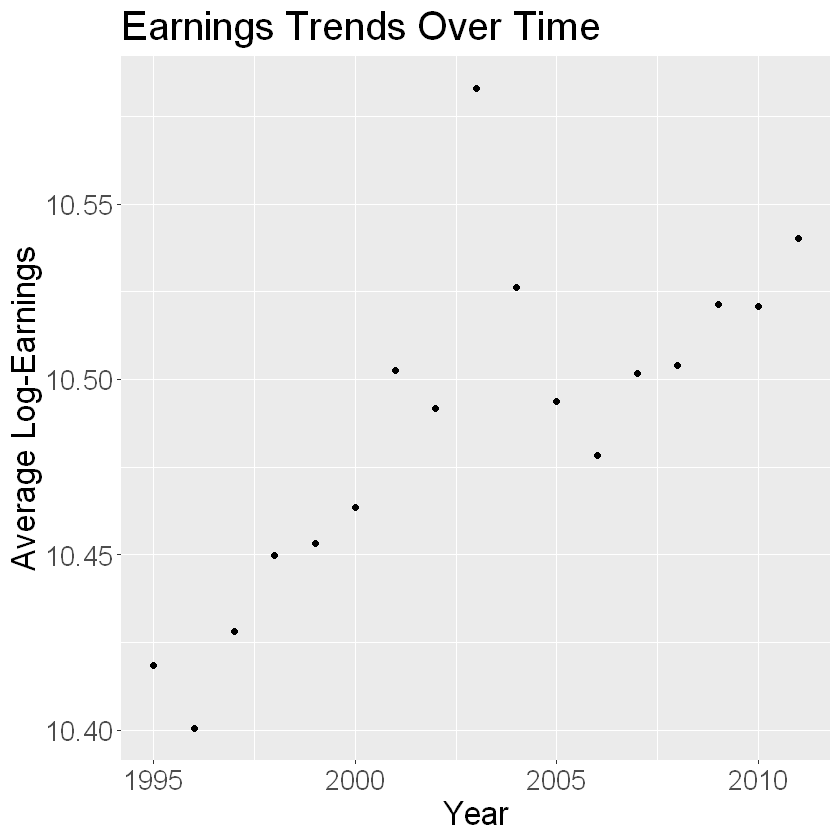

In [16]:
figure1

Once we've decided that our graph can successfully answer our economic question, we can export it from Jupyter. Once again, the ggplot package comes to our rescue with the `ggsave` command, which allows us to save a visualization using the following key arguments: `("file_name.file_format", my_plot, width = #, height = #)`.

The first part of the argument, "file_name.file_format" is where we give our graphic a descriptive name and specify which file format we want our graphic to be saved in the Jupyter workspace. If we are saving to a specific folder, we can add this before the file name with a `/` in between to delineate the two (example: `"folder/file_name.file_format"`). The format we choose may depend on the context we plan to use the visualization in. Images are typically stored in either raster or vector formats. 

Raster images are represented as a 2-D grid of square pixels, each with its own color. Raster images are often compressed before being stored so they take up less space. A compressed format is "lossy" if the image cannot be perfectly re-created when loading and displaying, with the hope that the change is not noticeable. "Lossless" formats, on the other hand, allow a perfect display of the original image.

Common raster file types:

* JPEG (.jpg, .jpeg): lossy, usually used for photographs
* PNG (.png): lossless, usually used for plots/line drawings
* BMP (.bmp): lossless, raw image data, no compression (rarely used)
* TIFF (.tif, .tiff): typically lossless, no compression, used mostly in graphic arts, publishing
* Open-source software: GIMP

Vector images are represented as a collection of mathematical objects (lines, surfaces, shapes, curves). When the computer displays the image, it redraws all of the elements using their mathematical formulas.

Common vector file types:

* SVG (.svg): general-purpose use
* EPS (.eps): general-purpose use (rarely used)
* Open-source software: Inkscape

Raster and vector images have advantages and disadvantages. A raster image of a fixed width and height takes the same amount of space and time to load regardless of what the image shows (the one caveat is that the compression algorithms may shrink the image more or run faster for certain images). A vector image takes space and time to load depending on how complex the image is, since the computer has to draw all the elements each time it is displayed. For example, if we have a scatter plot with 1 million points stored as an SVG file, it may take our computer some time to open the image. On the upside, with vector graphics we can zoom into/scale up the image as much as we like without it looking bad, while raster images eventually start to look “pixelated".

The second part of the argument, `my_plot`, specifies which plot in our analysis we'd like to export. The last key part of the argument, `width =` and `height =` specifies the dimensions of our image. Because we've tinkered with the graph output size using options (`repr.plot.width = 15, repr.plot.height = 9`) above in our code, we'll want to use these dimensions as we export to ensure that our visualization isn't cut off by R's default saving dimensions.

For instance, we may run

In [17]:
#ggsave("earnings_trends.png", figure, width = 15, height = 9) 

Did you see the file appear in the directory? Now try saving the same graph as a .svg in the code cell below.

In [18]:
#ggsave("earnings_trends. ...", figure, width = 15, height = 9) 

As we have seen, R makes it easy to create high-quality, impactful graphics. Try it on your own now with other variables.

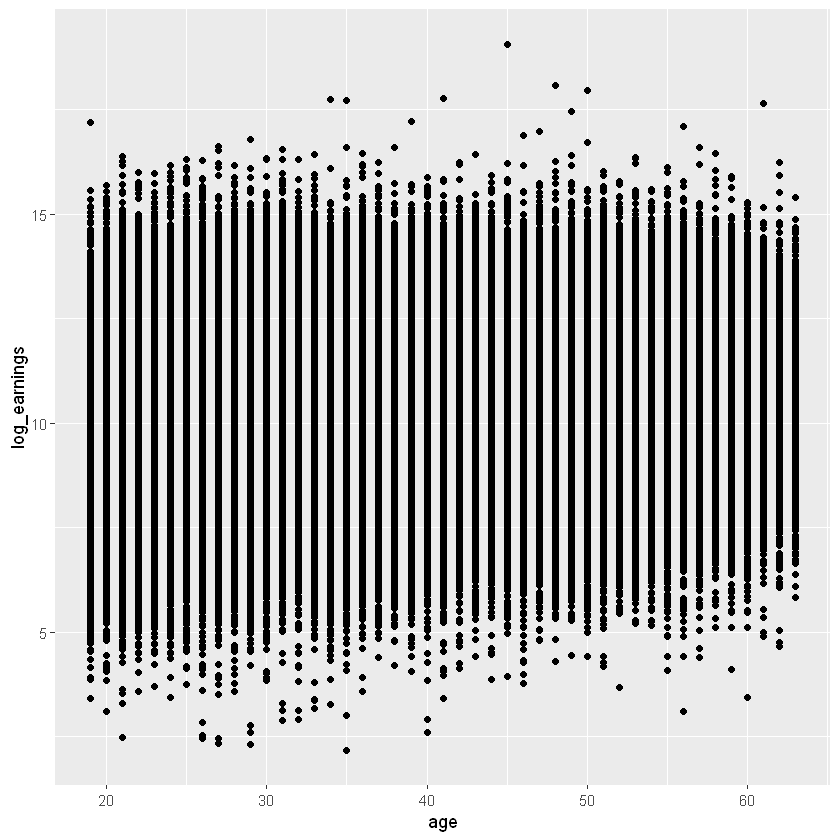

In [20]:
figure <- ggplot(data = fake_data, #associate the data we chose
                 aes(
                     x = age,  #x is year
                     y = log_earnings #our y is avg logearnings
                 ))

figure + geom_point()

#### 9.2.2 Line plots 

Notice that we previously had a graph where every year showed only *one point*. We could actually connect the single dots for every year and form a line. This typically happens when we have a *discrete* x-axis in our graph.

A very useful tool for graphing is facets. For example, If we want to compare the earnings over time of males and females. we can create a graph where there the x-axis is years, the y-axis is earnings and there are two line graphs, one line showing the female observations and another line showing the males. However, sometimes instead of wanting lines to be in the graph, we want to compare them side by side. This is where facets come in.

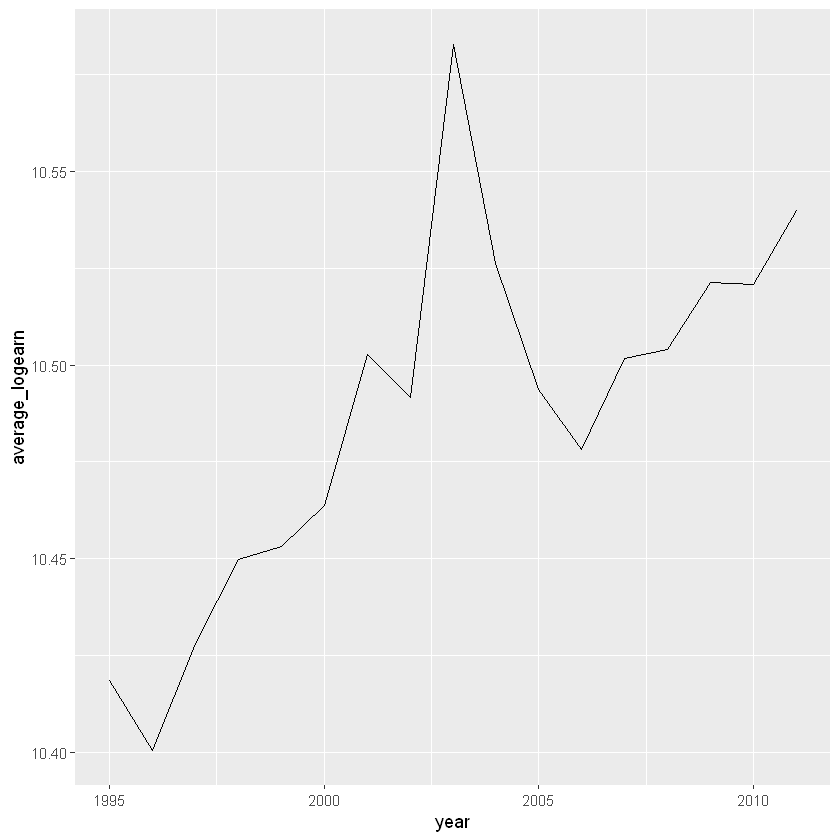

In [21]:
fake_data2 = fake_data %>%    #
    group_by(year, region) %>%
    summarize(average_logearn = mean(log_earnings))


figure2 <- ggplot(data = fake_data2,  # referencing the data we use
                aes( x = year,
                y = average_logearn, 
                color = region
            ))

# telling R the graph will be a line graph
figure2 <- figure2 + geom_line() 
# telling R the graph will use the discrete color pallet Dark2
figure2 <- figure2 + scale_color_distiller(palette="Dark2")
# adding labels
figure2 <- figure2 + labs(x = "Year", y = "Real GDP per capita (expenditure-based)", title = "av. log earnings for each region")
# asking R to make the 5 different facets of the same graph, one for each region
figure2 <- figure2 + facet_grid(cols = vars(region)) 


figure2

If we want to change the color pallet but don't know what specific color scheme we want to use, we can run `RColorBrewer::display.brewer.all()` in R and all the different pallets for discrete variables will appear.

#### 9.2.3 Histogram plots 

Histograms visualize the distribution of one quantitative variable. This plot works well when we are working with a discrete variable and are interested in visualizing all its possible values and how often they occur.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



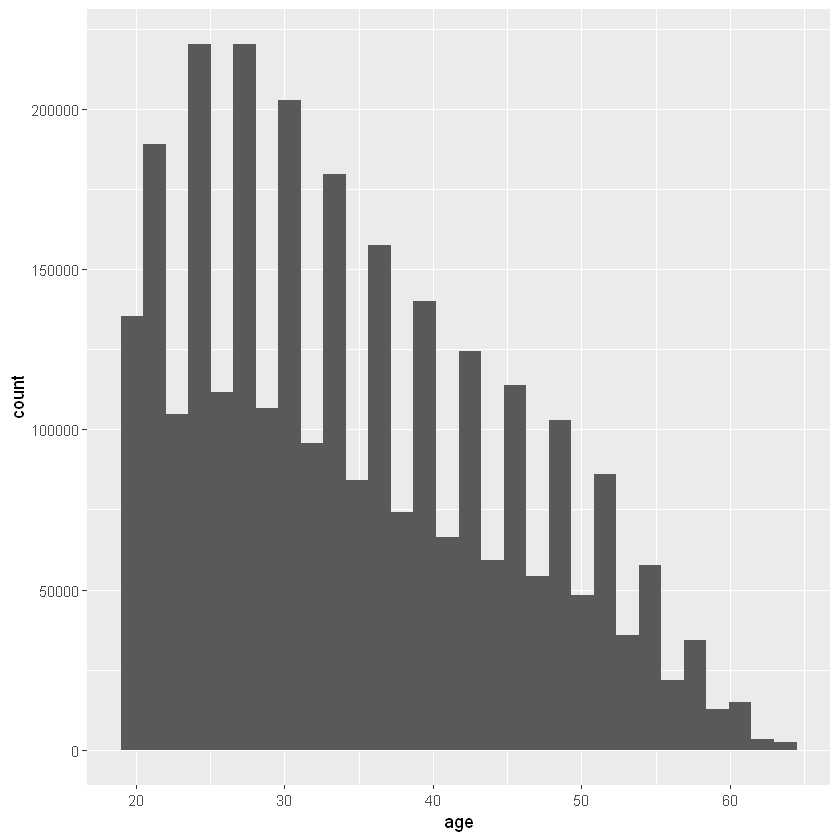

In [22]:
figure3 <- ggplot(data = fake_data, # referencing the data we chose
                 aes(
                     x = age, # x is year
                     color = "Red", 
                     fill ="Red" # changing the color of the graph
                 ))


figure3 <- figure + labs(x = "Age", y = "Density", title = "Example 3: Histograms" ) # adding labels
# adjusting the labels of the graph. If you change plot.title by any other section of the graph or legend, you can adjust it too with this command.
figure3 <- figure + theme(plot.title = element_text( size = 9, face = "bold", color = "green"  ))

figure3 <- figure3 + geom_histogram()
figure3 

#### 9.2.4 Bar plots

Bar plots visualize comparisons of amounts. They are useful when we are interested in comparing a few categories as parts of a whole or across time. *Bar plots should always start at 0. Starting bar plots at any number besides 0 is generally considered a misrepresentation of the data.*

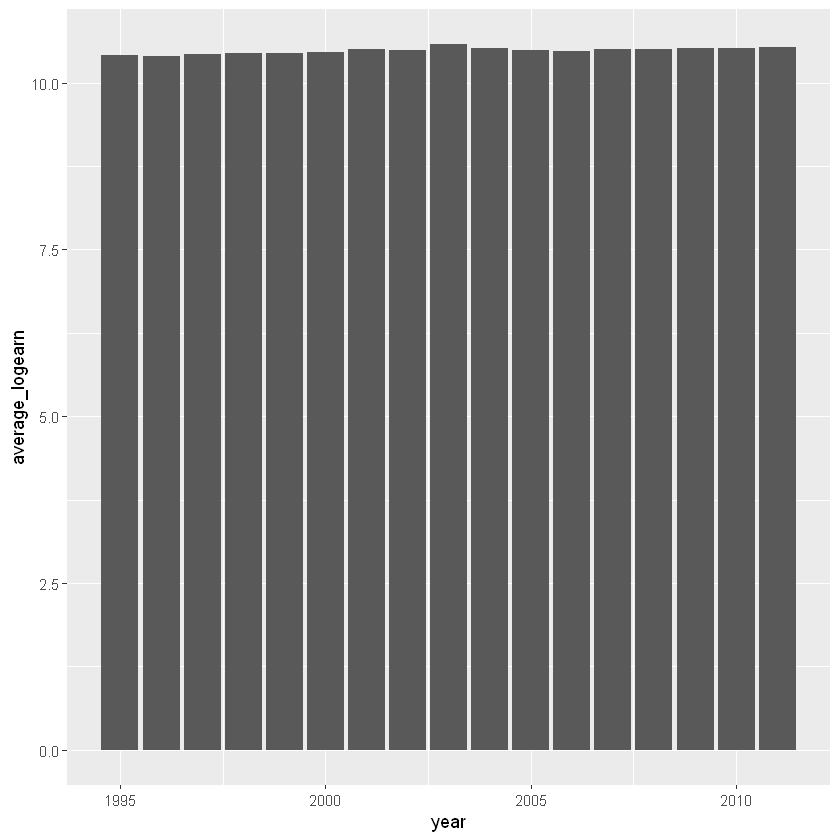

In [25]:
fake_data4 <- fake_data %>% 
  group_by(year, sex, treated) %>% 
  summarise(meanearnings = mean(earnings))



figure4 <- ggplot(data = fake_data4,  
                aes(x = year,   
                    y = meanearnings, 
                    fill = sex, 
                    color = sex
                ),
                ) 

figure4 <- figure4 + labs(x = "year", 
                    y = "Worker's mean earnings",
                    color = "sex",
                    title = "Does the treatment's effect change based on sex")

plot3 + geom_col(position = "dodge") 
plot3

## 9.3 Maps
R has the best packages to easily create really complex maps. Maps can be an incredibly valuable part of a research project. With them, we can demonstrate geographical, social, and political features of a particular place. For example, we can show elevation and temperature changes of a country. We can also show how population density or income changes throughout a region. During the 2020 USA presidential campaign, CNN showed a map of the United States divided by counties colored red, blue or white depending on what party the majority of the county voted for. That same map can be created using some very simple commands in R!

Lets start by creating a world map.

In [ ]:
World <- map_data("world")
ggplot() +
  geom_polygon(data = World, aes(x=long, y = lat, group = group), fill="deepskyblue", alpha=1)

We are using the data set World, since this data set is provided within one of the packages we installed earlier. It includes the coordinates and names of all countries. We can also map a particular country or region.

In [ ]:
Peru <- map_data("world") %>% filter(region=="Peru") # filtering the data to only use Peru 
  ggplot() +
  geom_polygon(data = Peru, aes(x=long, y = lat, group = group), fill="red", alpha=0.8) +
  coord_fixed(1)   # setting the transparency of the chart with alpha

Let us continue using the Peru example. Imagine we wanted to show the population of the 10 largest cities in Peru. Let's use the data below. 

In [3]:
city <- c("Lima", "Arequipa", "Trujillo",  "Chiclayo", "Piura", "Chimbote", "Huancayo", "Cuzco", "Iquitos", "Pucallpa")
lat <- c(-12.0464, -16.4090, -8.1060, -6.7701, -5.1783, -9.0633, -12.0686, -13.5320, -3.7437, -8.3929)
long <- c(-77.0428, -71.5375, -79.0330, -79.8550, -80.6549, -78.5890, -75.2103, -71.9675, -73.2516, -74.5826)
population <- c(9751717, 1008290, 891000, 552508, 484475, 371012, 456250, 428450, 483870, 326040)
data <- data.frame(city, lat, long, population)
data

city,lat,long,population
<chr>,<dbl>,<dbl>,<dbl>
Lima,-12.0464,-77.0428,9751717
Arequipa,-16.4090,-71.5375,1008290
Trujillo,-8.1060,-79.0330,891000
Chiclayo,-6.7701,-79.8550,552508
Piura,-5.1783,-80.6549,484475
Chimbote,-9.0633,-78.5890,371012
Huancayo,-12.0686,-75.2103,456250
Cuzco,-13.5320,-71.9675,428450
Iquitos,-3.7437,-73.2516,483870


In [4]:
Peru <- map_data("world") %>% filter(region=="Peru") 
  ggplot() +
  geom_polygon(data = Peru, aes(x=long, y = lat, group = group), fill="deepskyblue", alpha=0.7) + 
    geom_point( data=data, aes(x=long, y=lat, size=population,),  color="mediumblue",  alpha=0.6)+ # ddding the points showing population size 
    scale_size_continuous(range=c(8, 13)) + # choosing the size range of the population points 
     geom_text(data = data, label=paste0(data$city, ":", as.character(format(data$population, big.mark=","))), aes(x=long, y=lat), hjust=0.5, vjust=-2.7, fontface='bold', size=3) +
   theme_minimal() + # creating the titles for each population point
   theme(legend.position = 'none', panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.text = element_blank(), axis.title = element_blank())+
  ggtitle("The biggest cities in Peru by population of urban unit") + 
     theme(plot.title = element_text(lineheight=1, face="bold")) # creating the title of the map 

ERROR: Error in ggplot(): could not find function "ggplot"


Lets create now a world map showing GDP levels per country. To create this map, we need to download the Penn world Table version 10. 
https://www.rug.nl/ggdc/productivity/pwt/?lang=en
Click this link. When you are inside the webpage click the stata button. The dta file for the data set will download automatically. 

We will be using the 2018 `rgdpe` for our map. To get the data for only 2018 we need to filter out the data for all other years. 

In [ ]:
map_data <- read_dta("pwt100.dta") 
names(map_data)[names(map_data) == 'country'] <- 'region' # changing the name of the variable country to region 
map_data <- map_data %>%
  filter(year ==2018)   # filtering out the data for all other years
total <- left_join(World,map_data,by="region") # merging the world dataset with the PWT dataset

We merge the two data sets since the World data has all the coordinates that let us create the map in the first place. On the other hand, the map data has the income data we need. There is one slight problem. Although the World data has all countries, the map data doesn't. Some countries are in wars, very poor or don't have the ability to share their information, so data for those countries doesn't exist. To bypass this issue, we do a left_join so that the world coordinates stay intact and we can add the existing income data for to the data set.

In [ ]:
World <- map_data("world")
ggplot() +
  geom_polygon(aes(x=long,y=lat,group=group,fill=rgdpe),data= total) +
    scale_fill_distiller(palette = "YlOrBr") + theme_minimal() +
  theme(panel.grid = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) + 
  coord_sf(datum=NA) +
  labs(title = "GDP in international prices in 2018", subtitle = "Penn World Table, 2018")

## Exercise 1

We want to visualize if the treatment's effect on average earnings changes based on a worker's sex. Create the graph shown below. It should have two lines, one indicating how average earnings change over time for male workers and the other for female workers. 

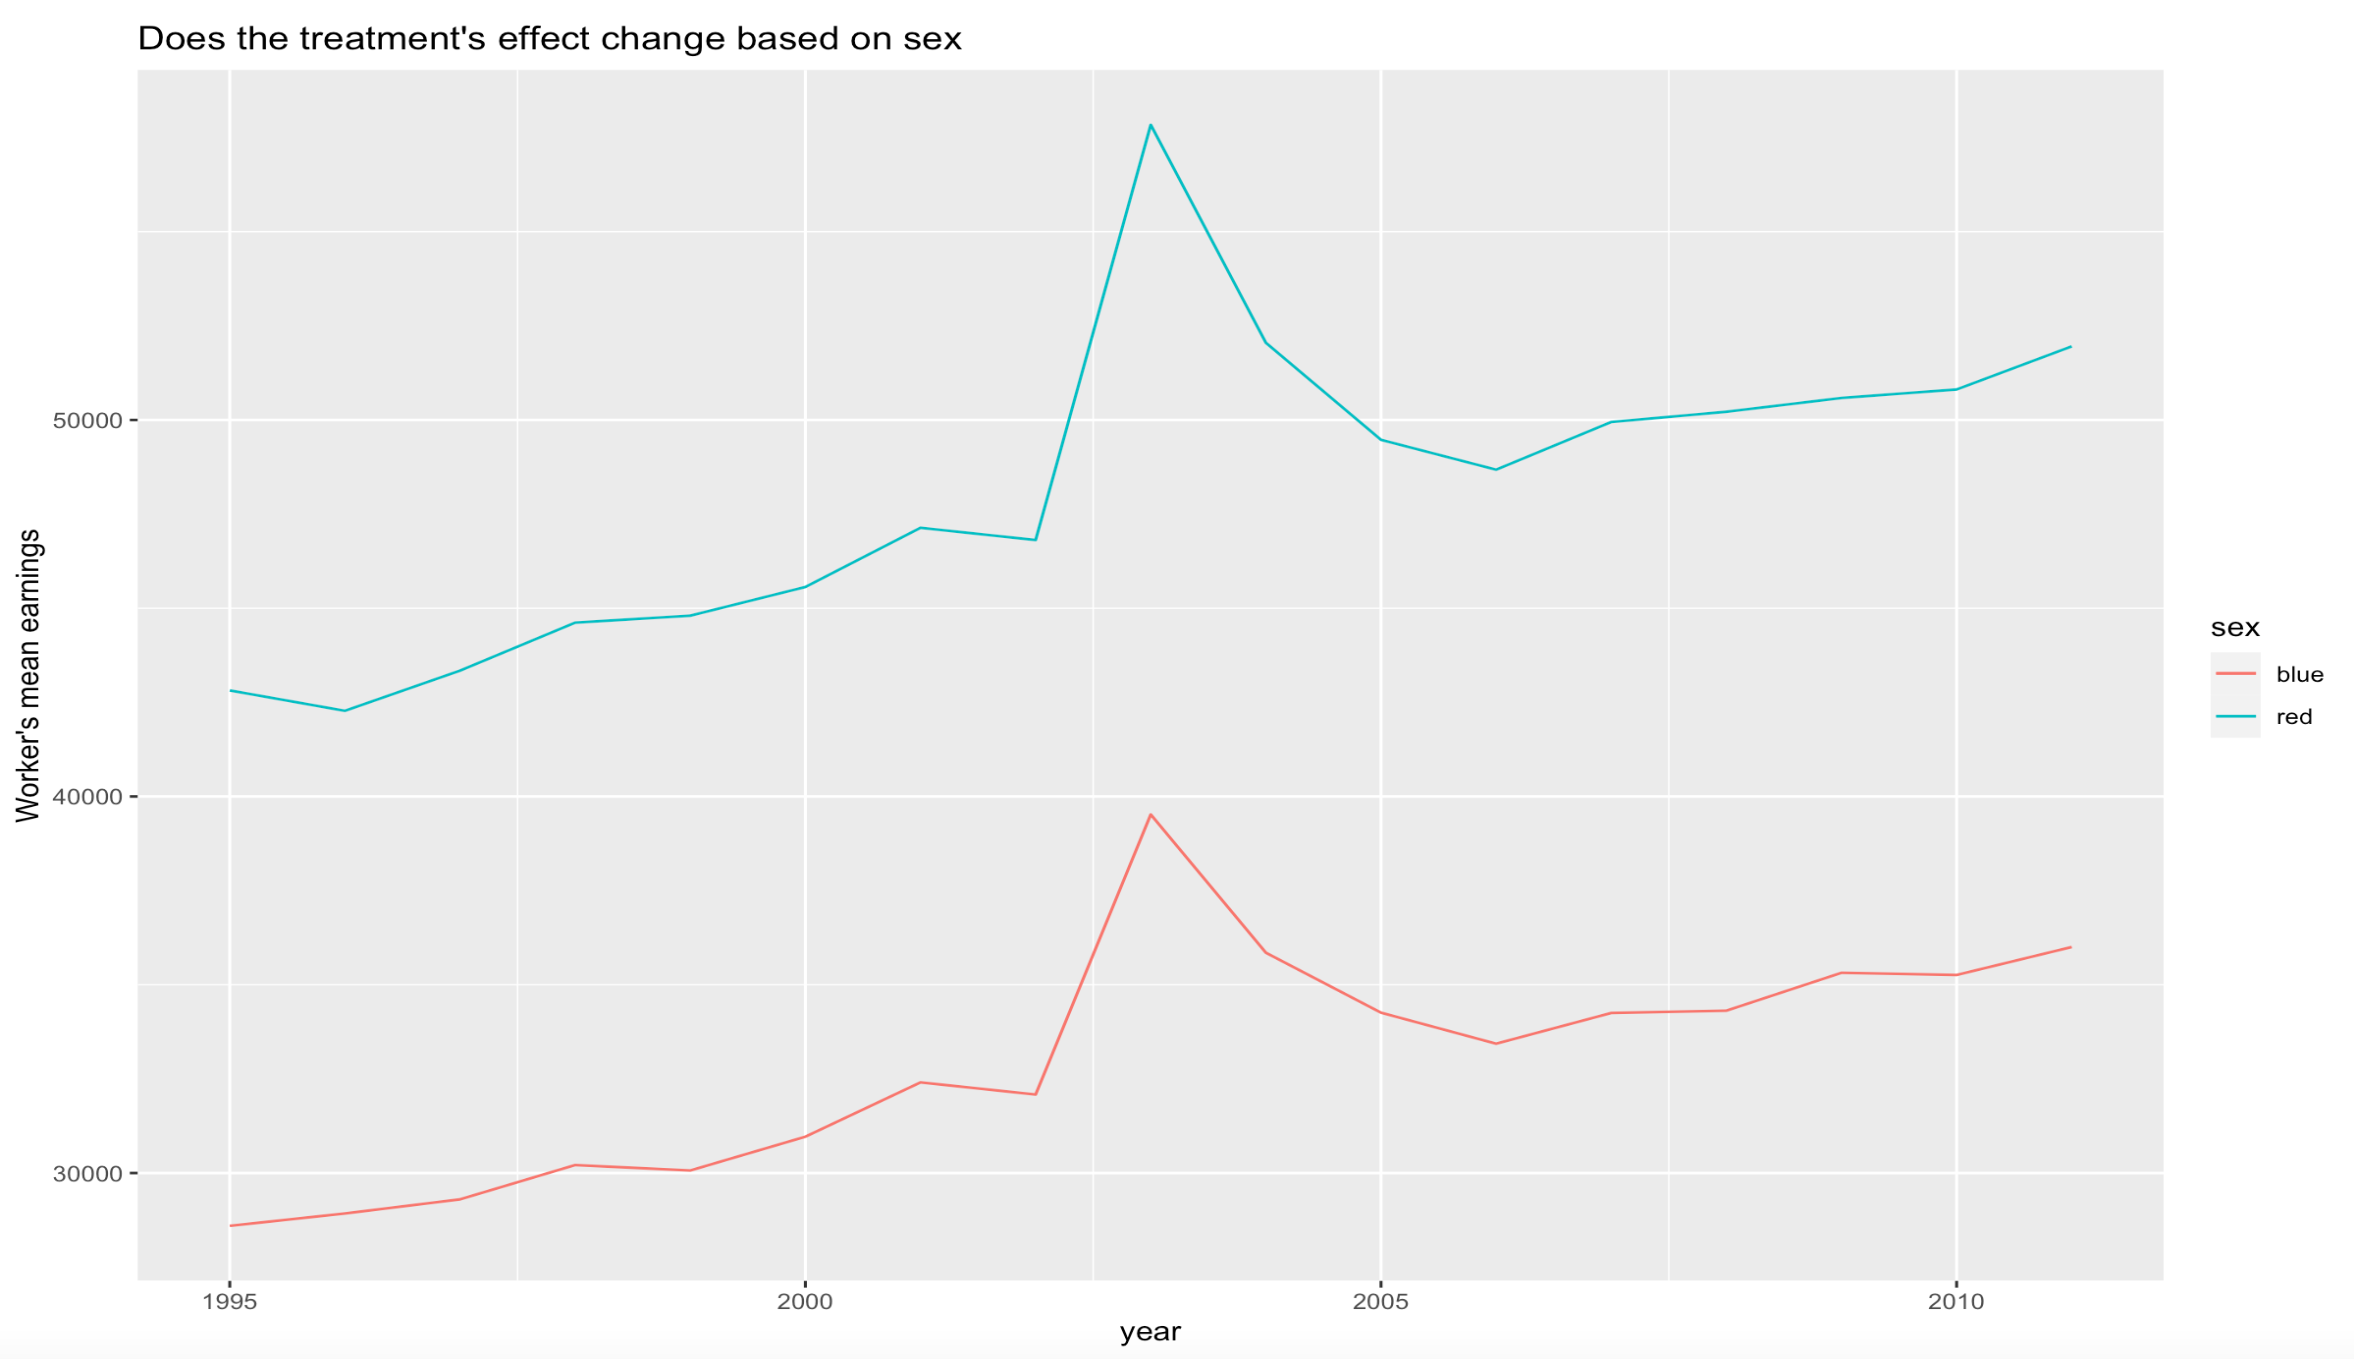

The first step should be preparing the data by generating variables for group analysis.

In [ ]:
fake_data2 <- fake_data %>% 
  group_by(variable_name, variable_name, variable_name) %>% 
  summarise(meanearnings = x))
  

fake_data2 <- fake_data2 %>% 
    mutate(variable_name = case_when(
        sex == , 
        sex == )) 

In [ ]:
plot1 <- ggplot(data = filter(dataset, variable_name == ),  
                aes(x = ),
                ) 

plot1 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 1),aes( y = ,
                    color =  
                ),
                ) 

plot1 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 0),aes( y = , 
                    color =  
                ),
                ) 

plot1 <- plot1 + labs(x = , 
                    y = ,
                    color = ,
                    title = )
plot1

## Exercise 2

Sometimes the mean can be deceptive.Create the same graph as question 1 using the median earnings rather than mean earnings.The graph should look like the image below.

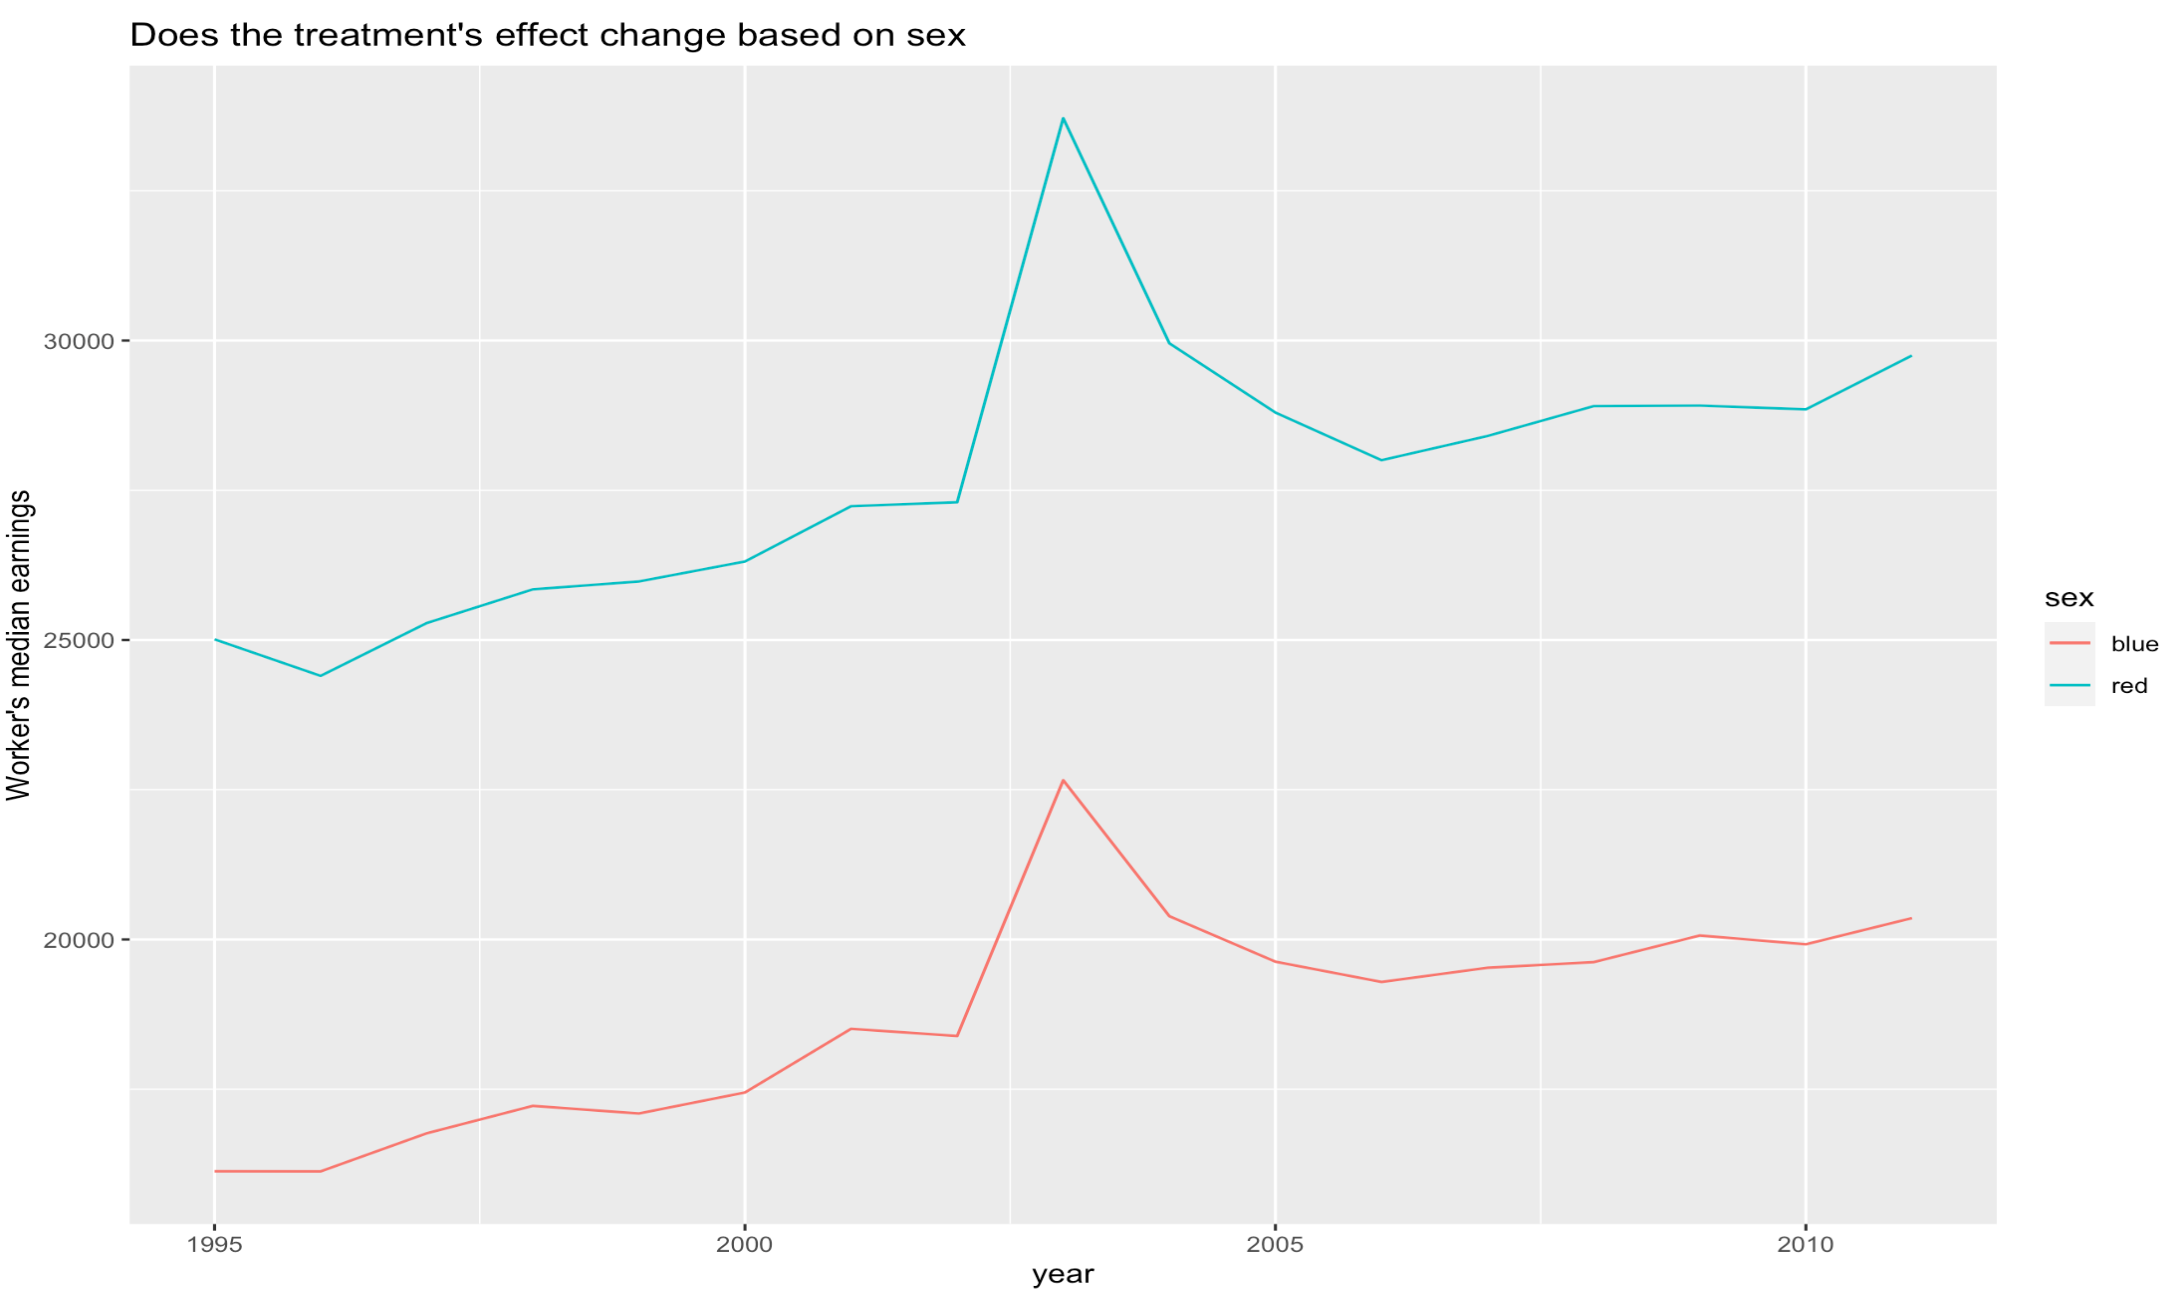

In [1]:
fake_data3 <- fake_data %>% 
  group_by(variable_name, variable_name, variable_name) %>% 
  summarise(medianearnings = x))
  

fake_data3 <- fake_data2 %>% 
    mutate(variable_name = case_when(
        sex == , 
        sex == )) 

plot2 <- ggplot(data = filter(dataset, variable_name == ),  
                aes(x = ),
                ) 

plot2 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 1),aes( 
                ),
                ) 

plot2 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 0),aes( 
                ),
                ) 

plot2 <- plot1 + labs(x = , 
                    y = ,
                    color = ,
                    title = )
plot2

ERROR: Error in parse(text = x, srcfile = src): <text>:3:32: unexpected ')'
2:   group_by(variable_name, variable_name, variable_name) %>% 
3:   summarise(medianearnings = x))
                                  ^


## Exercise 3

Show another way we can visualize how the treatment's effect on earnings changes based on sex. Specically, recreate the graph shown below.

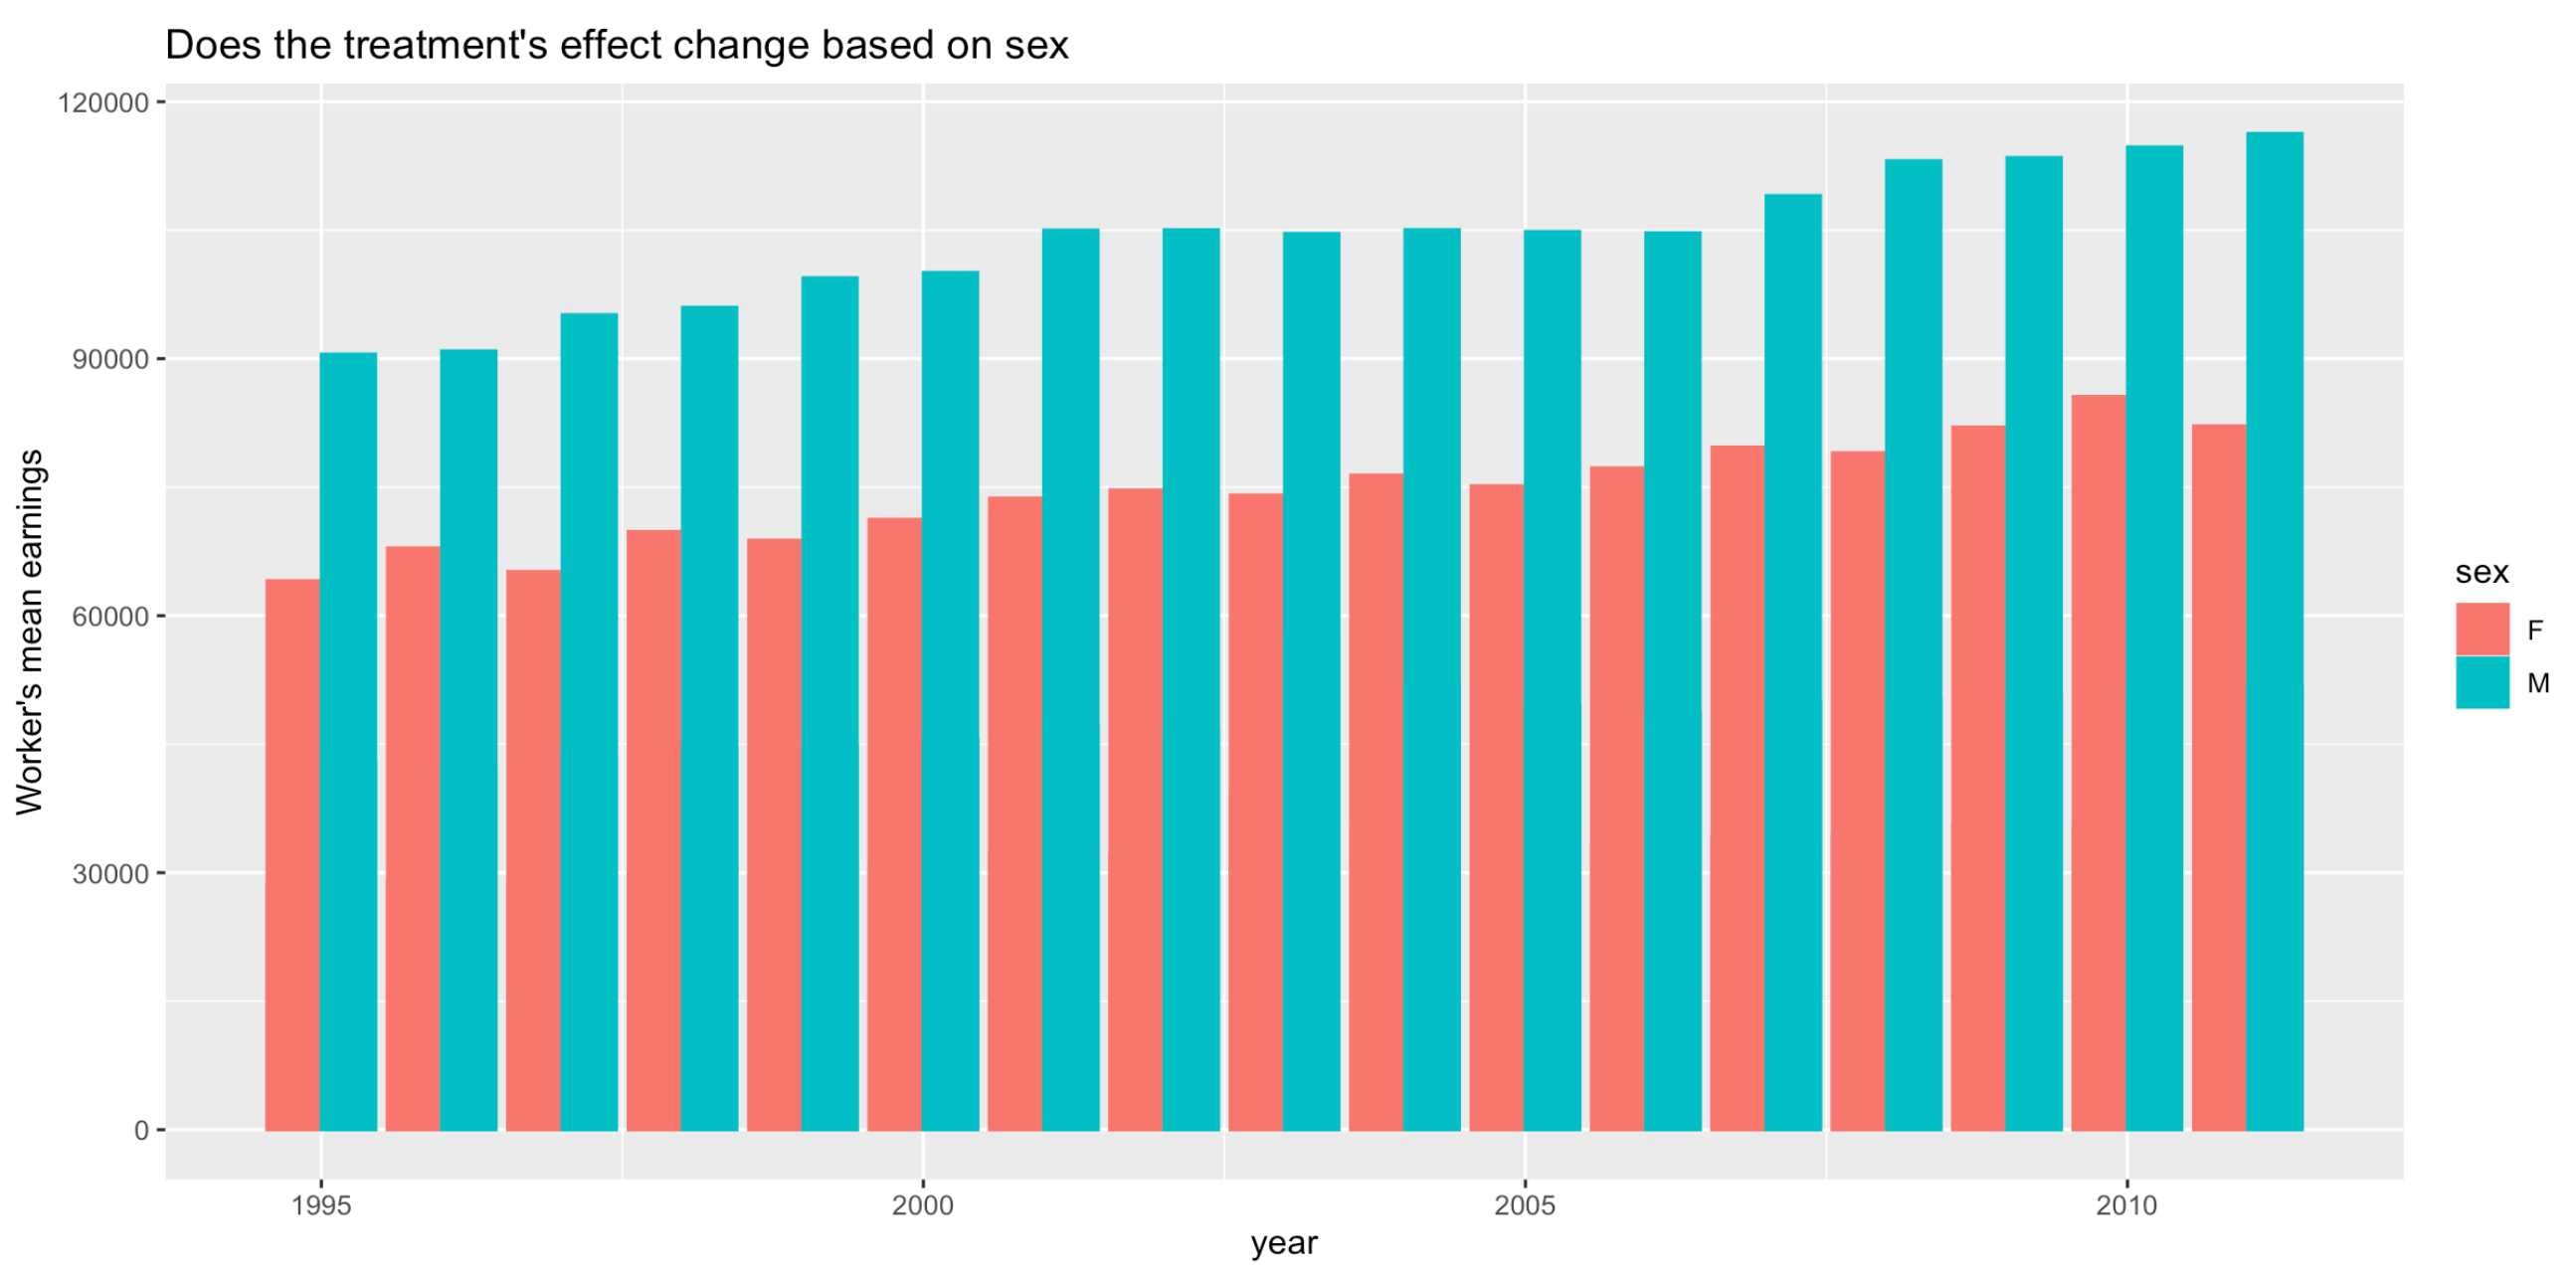

In [ ]:
fake_data4 <- fake_data %>% 
   group_by(variable_name, variable_name) %>% 
  summarise(meanearnings = x))

plot3 <- ggplot(data = fake_data4,  
                aes( 
                   
                ),
                ) 

plot3 <- plot3 + labs()

plot3 + geom_col(position = ) 
plot3

## Exercise 4

Recreate the graph shown below.

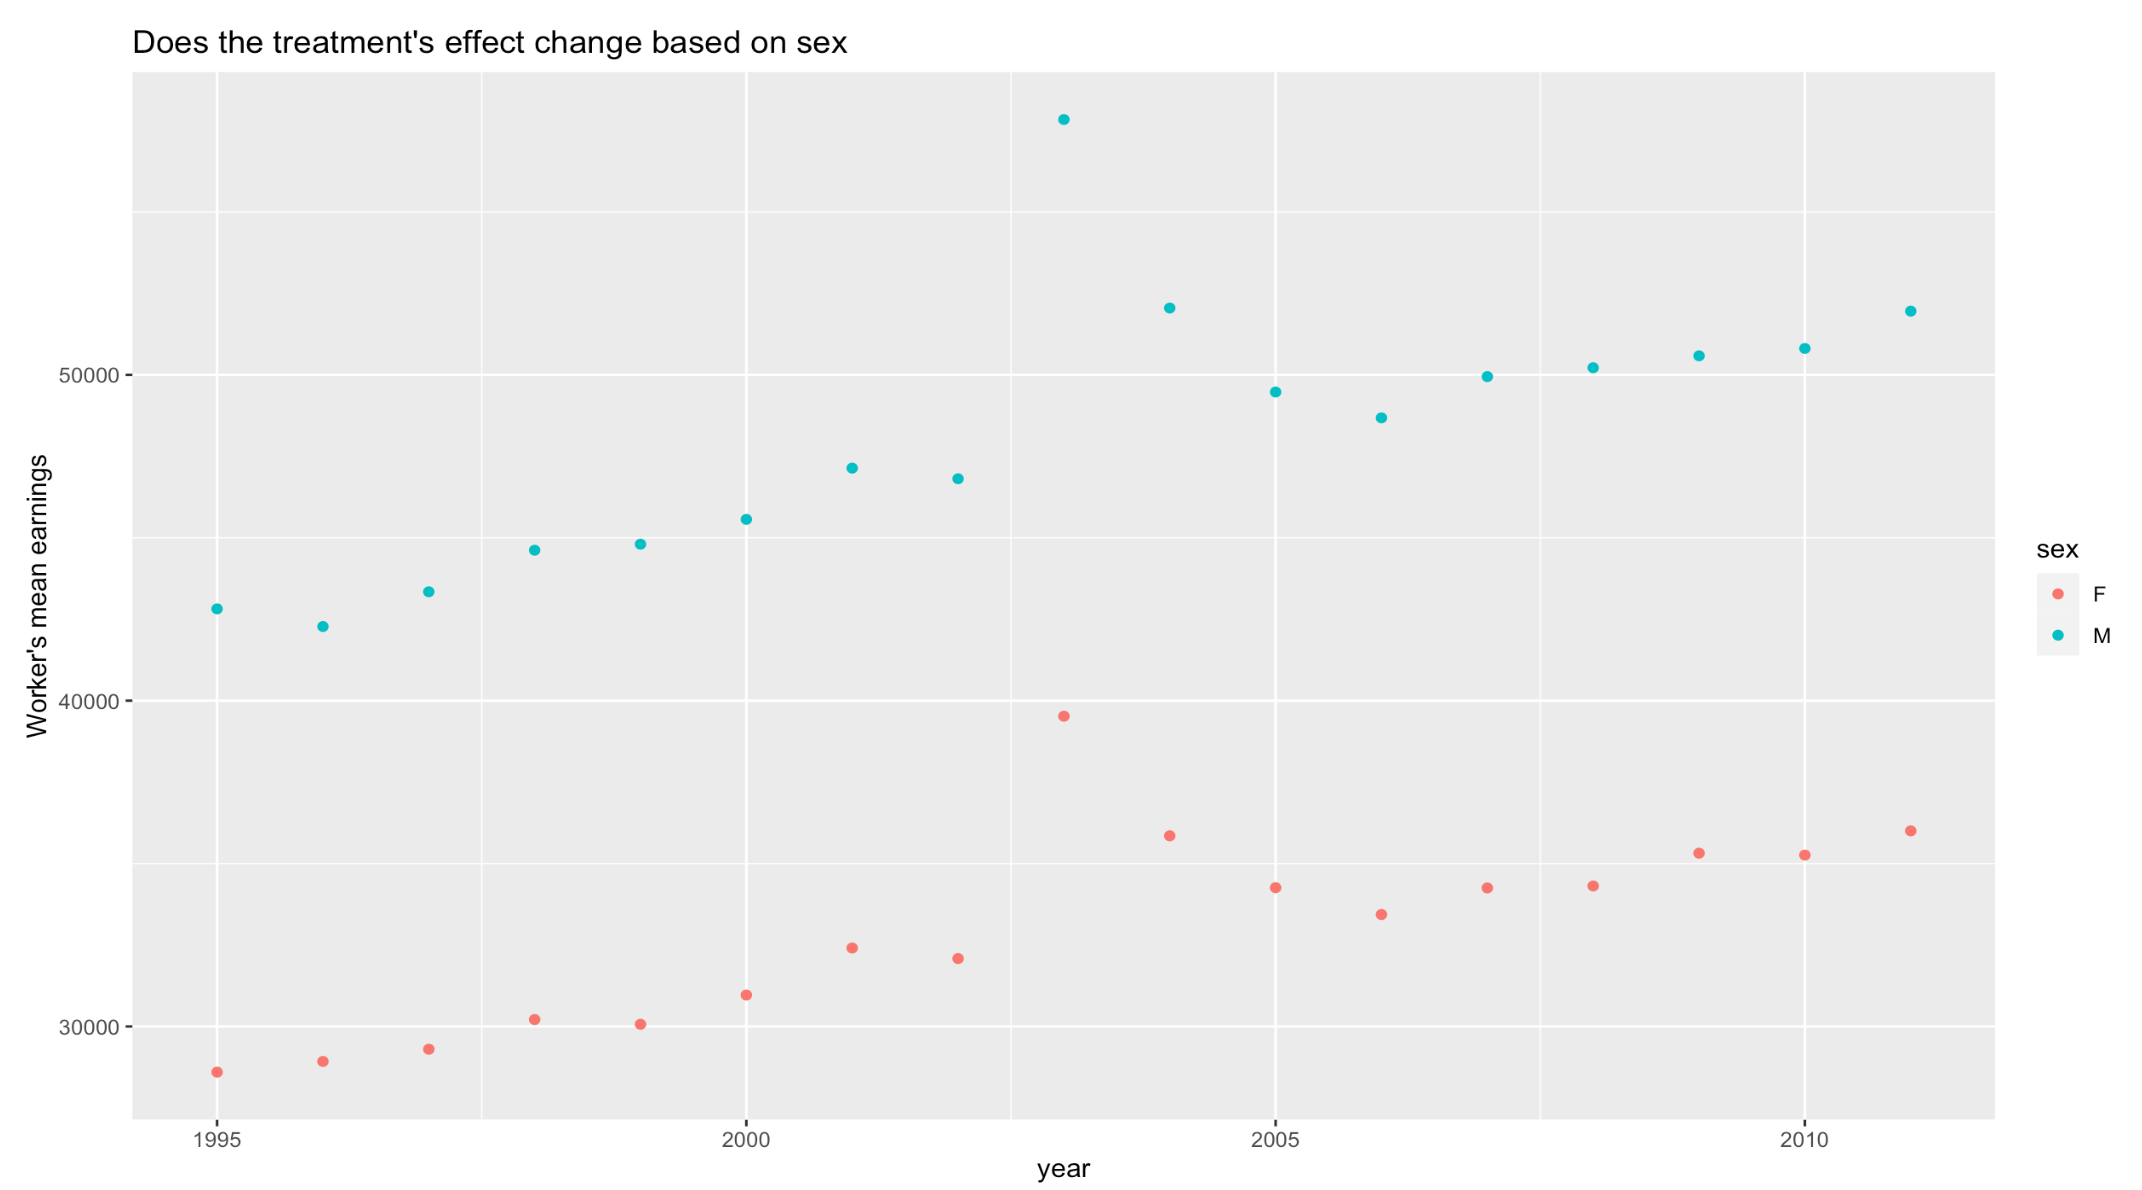

In [ ]:
plot4 <- ggplot(data = filter(fake_data2, ),  
                aes(x = , 
                    y = ,
                    color = ),
                ) 

plot4 <- plot4+ geom_point( ) 

plot4 <- plot4 + labs(x = , 
                    y = ,
                    color = ,
                    title = )
plot4

## 9.4 Wrap Up

We have learned in this module how to create different types of graphs using the command `ggplot()` and how to adjust them with the multiple options this command has. However, the most valuable lesson form this module is understanding when to use a specific type of graph. Graphs are only able to illustrate a story if we use them wisely and with strategically chosen options. Remember to check the R documentation when creating graphs. It may become your best friend.

## References

- [The details of ggplot](https://www.youtube.com/watch?v=h29g21z0a68)